<a href="https://colab.research.google.com/github/enggisabrilla/Optimasi-Model-Prediksi-Harga-Saham-BBNI-Menggunakan-SVR-dengan-Tuning-Hyperparameter/blob/main/Support_Vector_Regression_(SVR)_BNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset

In [54]:
data = pd.read_csv('/content/BNI.csv')

In [55]:
data.shape

(1499, 7)

In [56]:
data

,Tanggal,Harga Buka,Harga Tertinggi,Harga Terendah,Harga Tutup,Harga Penutupan Disesuaikan,Volume Perdagangan
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3718.353760,0
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3686.663086,15681200
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3686.663086,21416600
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3686.663086,41078600
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3750.043945,48108200
...,...,...,...,...,...,...,...
1494,2025-02-11,4150.0,4170.0,4050.0,4070.0,4070.000000,52994400
1495,2025-02-12,4130.0,4300.0,4100.0,4300.0,4300.000000,57782300
1496,2025-02-13,4280.0,4300.0,4210.0,4250.0,4250.000000,38173200
1497,2025-02-14,4310.0,4390.0,4300.0,4370.0,4370.000000,61932800


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tanggal                      1499 non-null   object 
 1   Harga Buka                   1499 non-null   float64
 2   Harga Tertinggi              1499 non-null   float64
 3   Harga Terendah               1499 non-null   float64
 4   Harga Tutup                  1499 non-null   float64
 5   Harga Penutupan Disesuaikan  1499 non-null   float64
 6   Volume Perdagangan           1499 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.1+ KB


# Missing Value

In [58]:
data.isnull().sum()

,0
Tanggal,0
Harga Buka,0
Harga Tertinggi,0
Harga Terendah,0
Harga Tutup,0
Harga Penutupan Disesuaikan,0
Volume Perdagangan,0


# Pre-Processing

In [59]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.sort_values('Tanggal')

In [60]:
df['Close_Lag1'] = df['Harga Tutup'].shift(1)
df['Volume_Lag1'] = df['Volume Perdagangan'].shift(1)
df['Rolling_Close_7'] = df['Harga Tutup'].rolling(window=7).mean()

In [61]:
df.dropna(inplace=True)

In [62]:
print(df.columns)
df.columns = df.columns.str.strip()  # Menghapus spasi di awal dan akhir nama kolom

X = df[['Harga Buka', 'Harga Terendah', 'Harga Tutup', 'Close_Lag1', 'Volume_Lag1', 'Rolling_Close_7']]
y = df['Harga Tutup']

Index(['Tanggal', 'Harga Buka', 'Harga Tertinggi', 'Harga Terendah',
       'Harga Tutup', 'Harga Penutupan Disesuaikan', 'Volume Perdagangan',
       'Close_Lag1', 'Volume_Lag1', 'Rolling_Close_7'],
      dtype='object')


# Split Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Normalisasi Fitur dan Target

In [64]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Train model SVR

In [65]:
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(C=100)

# Prediksi

In [66]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluasi Model SVR

In [67]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [68]:
print("📊 Evaluasi Model SVR:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²    : {r2:.4f}")

📊 Evaluasi Model SVR:
MAE  : 326.97
RMSE : 560.97
R²    : -0.3695


**Hasil evaluasi model SVR** (Support Vector Regression) menunjukkan bahwa model memiliki performa yang buruk:



*   MAE (Mean Absolute Error) = 326.97: Rata-rata kesalahan prediksi sebesar ~Rp327, yang cukup besar tergantung skala harga tiket.
*   RMSE (Root Mean Square Error) = 560.97: Nilai ini lebih sensitif terhadap outlier dan juga cukup tinggi.
*   R² (Koefisien Determinasi) = -0.3695: Nilai negatif menunjukkan bahwa model lebih buruk dibandingkan model rata-rata (baseline). Artinya, model ini gagal menangkap pola dalam data.

**Solusi :**
Tuning hyperparameter seperti C, epsilon, dan kernel.

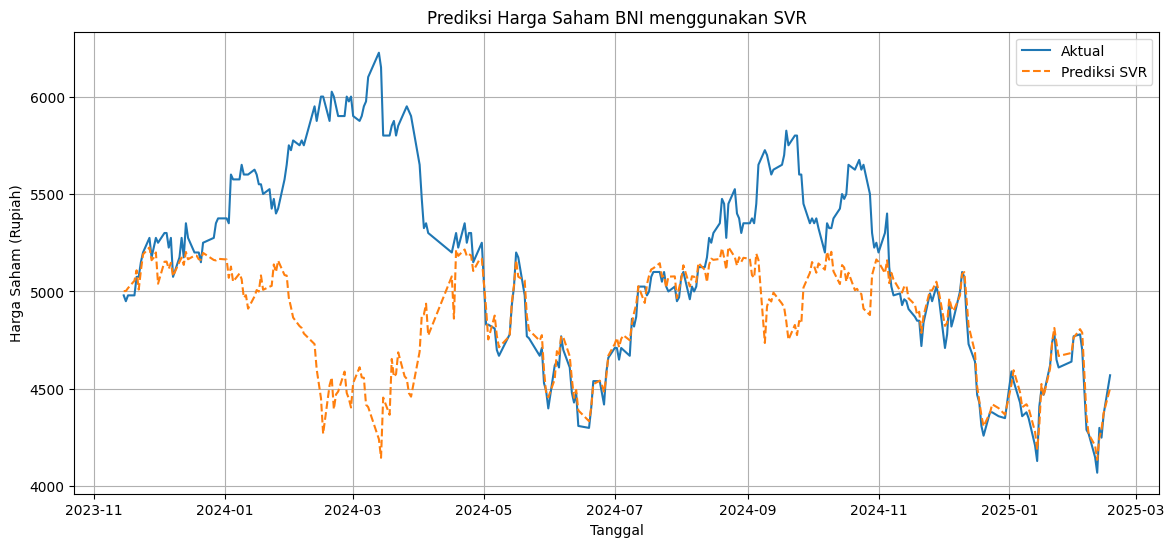

In [69]:
plt.figure(figsize=(14,6))
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_test.values, label='Aktual')
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_pred, label='Prediksi SVR', linestyle='--')
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham (Rupiah)")
plt.title("Prediksi Harga Saham BNI menggunakan SVR")
plt.legend()
plt.grid(True)
plt.show()

Grafik prediksi harga saham BNI menggunakan model Support Vector Regression (SVR), yang membandingkan antara harga saham aktual (garis biru) dan harga saham hasil prediksi SVR (garis oranye putus-putus) dalam rentang waktu dari sekitar November 2023 hingga Februari 2025.

**Penjelasan:**

**1. Garis Biru (Aktual):**
  * Mewakili harga saham BNI sebenarnya dari waktu ke waktu.
  * Terlihat fluktuasi yang signifikan, dengan beberapa puncak dan lembah—menunjukkan dinamika pasar saham.

**2. Garis Oranye Putus-putus (Prediksi SVR):**

  * Mewakili hasil prediksi harga saham oleh model SVR.

  * Terlihat bahwa garis ini tidak mengikuti pola fluktuasi aktual dengan baik, terutama pada bagian-bagian saat harga naik atau turun tajam.

  * Cenderung lebih halus dan kurang responsif terhadap perubahan mendadak (karakteristik umum SVR yang tidak dilatih optimal).

**3. Kinerja Model (berdasarkan grafik dan metrik sebelumnya):**

  * Prediksi SVR tampak kurang akurat, terutama di bagian tengah dan awal grafik (sekitar awal 2024 hingga pertengahan 2024), di mana harga aktual naik drastis tapi prediksi tidak mengikutinya.

  * Hal ini sejalan dengan nilai R² negatif (-0.3695), yang menunjukkan bahwa model gagal menangkap variabilitas data aktual.

**4. Kemungkinan Penyebab:**

  * Data input tidak distandarisasi (SVR sangat peka terhadap skala fitur).

  * Model belum di-tuning dengan baik (parameter C, epsilon, kernel mungkin belum optimal).

# Solusi

## Tuning Hyperparameter SVR

In [70]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk tuning hyperparameter
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}

# GridSearchCV untuk SVR
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit grid search
grid_search.fit(X_train_scaled, y_train_scaled)

# Menampilkan parameter terbaik
print("Best Parameters: ", grid_search.best_params_)

# Menggunakan model terbaik dari GridSearch
best_svr_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_scaled = best_svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Evaluasi Model SVR Setelah Tuning Hyperparameter:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²    : {r2:.4f}")

Best Parameters:  {'C': 100, 'epsilon': 0.01, 'gamma': 0.01}
📊 Evaluasi Model SVR Setelah Tuning Hyperparameter:
MAE  : 15.51
RMSE : 26.61
R²    : 0.9969


1. MAE (Mean Absolute Error) = 15.51
Artinya, rata-rata kesalahan prediksi hanya sekitar Rp15,51 — sangat kecil.

2. RMSE (Root Mean Squared Error) = 26.61
Juga sangat rendah, menunjukkan bahwa error tidak hanya kecil, tetapi juga tidak ada outlier besar.

3. R² (Koefisien Determinasi) = 0.9969
Ini luar biasa. Artinya model menjelaskan 99.69% variabilitas harga saham — akurasi sangat tinggi dan fit hampir sempurna.

**Kesimpulan:**
  * Tuning hyperparameter terbukti meningkatkan performa secara signifikan dari sebelumnya (R² = -0.3695) menjadi sekarang (R² = 0.9969 / 99.69%).

  * Model sekarang sangat akurat dan dapat diandalkan untuk prediksi harga saham.

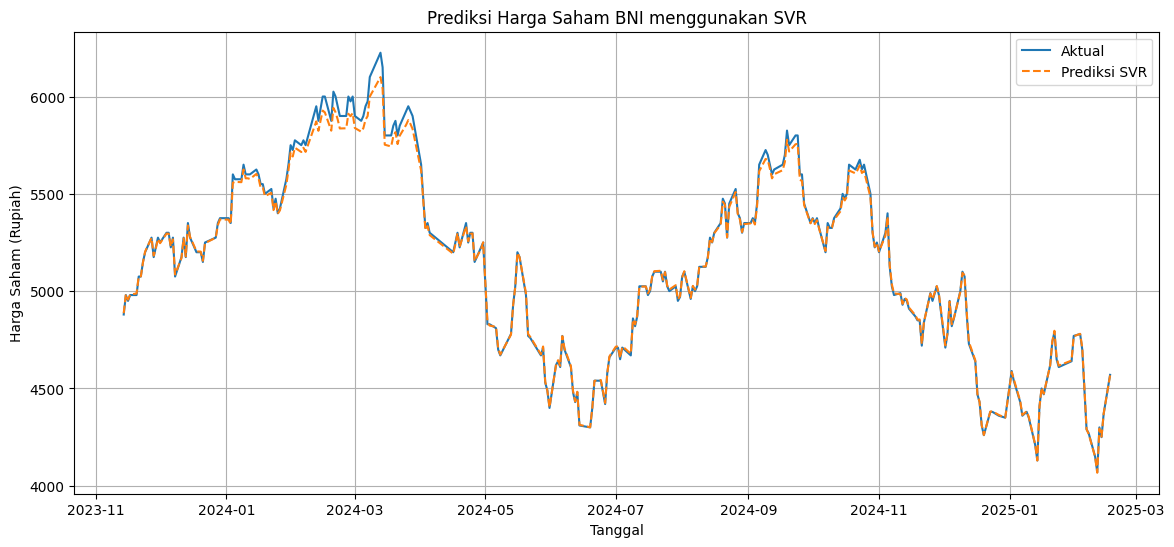

In [51]:
plt.figure(figsize=(14,6))
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_test.values, label='Aktual')
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_pred, label='Prediksi SVR', linestyle='--')
plt.xlabel("Tanggal")
plt.ylabel("Harga Saham (Rupiah)")
plt.title("Prediksi Harga Saham BNI menggunakan SVR")
plt.legend()
plt.grid(True)
plt.show()

**1. Garis Biru (Aktual):**
  *Menampilkan harga saham BNI sebenarnya dari November 2023 hingga Februari 2025.

  * Terlihat fluktuasi alami pasar dengan tren naik-turun yang cukup tajam.

**2. Garis Oranye Putus-putus (Prediksi SVR):**
  * Ini adalah hasil prediksi model SVR yang sudah di-tuning (C=100, epsilon=0.01, gamma=0.01).

  * Sangat melekat erat dengan garis aktual, menunjukkan bahwa model berhasil menangkap pola harga saham dengan sangat baik.

**3. Kesesuaian Model:**
  * Hampir tidak ada perbedaan visual yang signifikan antara harga aktual dan prediksi.

  * Ini mencerminkan nilai R² = 0.9969, yaitu bahwa 99,69% variasi dalam data aktual dijelaskan oleh model.

**4. Perbandingan dengan Sebelumnya:**
  * Grafik sebelumnya (sebelum tuning) menunjukkan perbedaan mencolok antara prediksi dan aktual (underfitting).

  * Grafik ini menunjukkan model dengan generalisasi dan presisi yang sangat tinggi, bahkan pada tren naik/turun ekstrem.


**KESIMPULAN**

Model SVR dengan hyperparameter hasil tuning sangat efektif dalam memprediksi harga saham BNI. Visualisasi ini menunjukkan bahwa model mampu mengikuti tren dan fluktuasi dengan akurasi yang tinggi, serta error prediksi yang sangat kecil.